##Importing Necessary Modules

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Load Dataset

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/PCOS_data_without_infertility.xlsx')

In [ ]:
df.shape

(541, 45)

In [ ]:
df.head(5)

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,NaN,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,NaN,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,NaN,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,NaN,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     242 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
df.isnull().sum()

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                       299
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                    532
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio           532
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [ ]:
#dropping unneccesary and null values
drop_col=df.iloc[:,0:2] #dropping sr no and patient number
df=df.drop(drop_col, axis=1)
df.shape
#total we have 43 columns

(541, 43)

#Handling missing values

In [ ]:
# renaming dataset columns
df = df.rename({'PCOS (Y/N)': 'pcos',' Age (yrs)':'Age','Weight (Kg)':'weight','Height(Cm)':'height','Pulse rate(bpm)':'pulse rate','RR (breaths/min)':'respiration rate','Hb(g/dl)':'hemoglobin','Cycle(R/I)':'cycle','Cycle length(days)':'cycle length','Marraige Status (Yrs)':'marraige yrs','Pregnant(Y/N)':'pregnant','No. of aborptions':'aborptions number','I   beta-HCG(mIU/mL)':'I_beta_hcg','II    beta-HCG(mIU/mL)':'II_beta_hcg','FSH(mIU/mL)':'FSH','LH(mIU/mL)':'LH','Hip(inch)':'Hip','Waist(inch)':'Waist','TSH (mIU/L)':'Thyroid_stimulating_hormone','AMH(ng/mL)':'Anti-Mullerian-Hormone','PRL(ng/mL)':'Prolactin levels','Vit D3 (ng/mL)':'Vitamin D levels','PRG(ng/mL)':'Progesterone levels','RBS(mg/dl)':'Random Blood Sugar','Weight gain(Y/N)':'weight gain','hair growth(Y/N)':'hair growth','Skin darkening (Y/N)':'skin darkening','Hair loss(Y/N)':'hair loss','Pimples(Y/N)':'pimples','Fast food (Y/N)':'fast food','Reg.Exercise(Y/N)':'reg.exercise','BP _Systolic (mmHg)':'bp sys','BP _Diastolic (mmHg)':'bp dia','Follicle No. (L)':'follicle left','Follicle No. (R)':'follicle right','Avg. F size (L) (mm)':'avg follicle size left','Avg. F size (R) (mm)':'avg follicle size right','Endometrium (mm)':'endometrium'}, axis=1)

In [ ]:
df.columns

Index(['pcos', 'Age', 'weight', 'Height(Cm) ', 'BMI', 'Blood Group',
       'Pulse rate(bpm) ', 'respiration rate', 'hemoglobin', 'cycle',
       'cycle length', 'marraige yrs', 'pregnant', 'aborptions number',
       '  I   beta-HCG(mIU/mL)', 'II_beta_hcg', 'FSH', 'LH', 'FSH/LH', 'Hip',
       'Waist', 'Waist:Hip Ratio', 'Thyroid_stimulating_hormone',
       'Anti-Mullerian-Hormone', 'Prolactin levels', 'Vitamin D levels',
       'Progesterone levels', 'Random Blood Sugar', 'weight gain',
       'hair growth', 'skin darkening', 'hair loss', 'pimples', 'fast food',
       'reg.exercise', 'bp sys', 'bp dia', 'follicle left', 'follicle right',
       'avg follicle size left', 'avg follicle size right', 'endometrium',
       'Unnamed: 44'],
      dtype='object')

In [ ]:
df.loc[:,"BMI"] = (df.loc[:,"weight"]) / np.square(df.loc[:,"Height(Cm) "]/100); # Calculate BMI(Body Mass Index)
df.loc[:,"BMI"] = df.loc[:,"BMI"].round(2); # Round to two decimal places

In [ ]:
df.loc[:,"FSH/LH"] = df.loc[:,"FSH"] / df.loc[:,"LH"];
df.loc[:,"FSH/LH"] = df.loc[:,"FSH/LH"].round(2);

In [ ]:
df.loc[:,"Waist:Hip Ratio"] = df.loc[:,"Waist"] / df.loc[:,"Hip"]
df.loc[:,"Waist:Hip Ratio"] = df.loc[:,"Waist:Hip Ratio"].round(2)

#Preprocessing datasets

In [ ]:
df.shape

(541, 43)

In [ ]:
df.head(5)

,pcos,Age,weight,Height(Cm),BMI,Blood Group,Pulse rate(bpm),respiration rate,hemoglobin,cycle,...,fast food,reg.exercise,bp sys,bp dia,follicle left,follicle right,avg follicle size left,avg follicle size right,endometrium,Unnamed: 44
0,0,28,44.6,152.0,19.30,15,78,22,10.48,2,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,0,36,65.0,161.5,24.92,15,74,20,11.70,2,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,1,33,68.8,165.0,25.27,11,72,18,11.80,2,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,0,37,65.0,148.0,29.67,13,72,20,12.00,2,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,0,25,52.0,161.0,20.06,11,72,18,10.00,2,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
#renaming dataset columns
df = df.rename({'PCOS (Y/N)': 'pcos',' Age (yrs)':'Age','Weight (Kg)':'weight','Height(Cm)':'height','Pulse rate(bpm)':'pulse rate','RR (breaths/min)':'respiration rate','Hb(g/dl)':'hemoglobin','Cycle(R/I)':'cycle','Cycle length(days)':'cycle length','Marraige Status (Yrs)':'marraige yrs','Pregnant(Y/N)':'pregnant','No. of aborptions':'aborptions number','I   beta-HCG(mIU/mL)':'I_beta_hcg','II    beta-HCG(mIU/mL)':'II_beta_hcg','FSH(mIU/mL)':'FSH','LH(mIU/mL)':'LH','Hip(inch)':'Hip','Waist(inch)':'Waist','TSH (mIU/L)':'Thyroid_stimulating_hormone','AMH(ng/mL)':'Anti-Mullerian-Hormone','PRL(ng/mL)':'Prolactin levels','Vit D3 (ng/mL)':'Vitamin D levels','PRG(ng/mL)':'Progesterone levels','RBS(mg/dl)':'Random Blood Sugar','Weight gain(Y/N)':'weight gain','hair growth(Y/N)':'hair growth','Skin darkening (Y/N)':'skin darkening','Hair loss(Y/N)':'hair loss','Pimples(Y/N)':'pimples','Fast food (Y/N)':'fast food','Reg.Exercise(Y/N)':'reg.exercise','BP _Systolic (mmHg)':'bp sys','BP _Diastolic (mmHg)':'bp dia','Follicle No. (L)':'follicle left','Follicle No. (R)':'follicle right','Avg. F size (L) (mm)':'avg follicle size left','Avg. F size (R) (mm)':'avg follicle size right','Endometrium (mm)':'endometrium'}, axis=1)

In [ ]:
# df=df.dropna() #dropiing na values


In [ ]:
#Replacing Irrelevant value

# df[df["Cycle(R/I)"] == 5]
df["cycle"].replace({5: 4}, inplace=True)
df["cycle"].replace({2: 0, 4: 1}, inplace=True)

df["II_beta_hcg"].replace({"1.99.": 1.99}, inplace=True)

df["II_beta_hcg"] = df["II_beta_hcg"].astype(float)
# df[df["Anti-Mullerian-Hormone"]== "a"].T


In [ ]:

# df_f.drop(df_f["AMH(ng/mL)"]== "a", inplace=True)
df.drop(df.loc[df["Anti-Mullerian-Hormone"]== "a"].index, inplace=True);

#Ploating

0    363
1    177
Name: pcos, dtype: int64


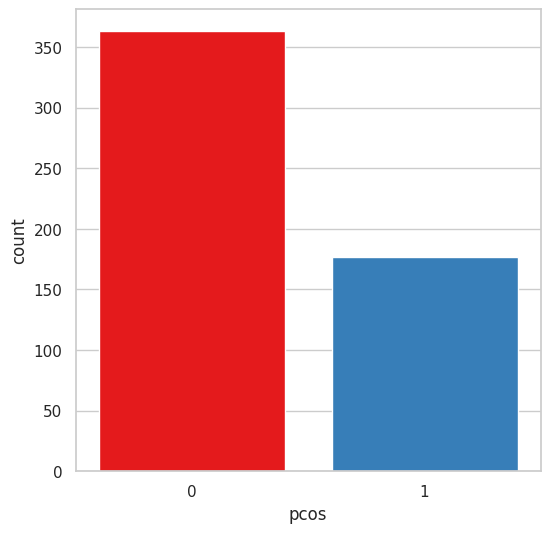

In [ ]:
print(df['pcos'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='pcos',
    data=df,
    palette = "Set1",
    saturation = 1
);

In [ ]:
 df=df.drop("Unnamed: 44" ,axis=1)

In [ ]:

df.shape

(540, 42)

In [ ]:
df=df.dropna()

In [ ]:
df["pcos"].value_counts()

0    362
1    176
Name: pcos, dtype: int64

In [ ]:
y=df.iloc[:,0]
y

0      0
1      0
2      1
3      0
4      0
      ..
536    0
537    0
538    0
539    0
540    1
Name: pcos, Length: 538, dtype: int64

In [ ]:
X=df.iloc[:,1:]
X.isnull().sum()

Age                            0
weight                         0
Height(Cm)                     0
BMI                            0
Blood Group                    0
Pulse rate(bpm)                0
respiration rate               0
hemoglobin                     0
cycle                          0
cycle length                   0
marraige yrs                   0
pregnant                       0
aborptions number              0
  I   beta-HCG(mIU/mL)         0
II_beta_hcg                    0
FSH                            0
LH                             0
FSH/LH                         0
Hip                            0
Waist                          0
Waist:Hip Ratio                0
Thyroid_stimulating_hormone    0
Anti-Mullerian-Hormone         0
Prolactin levels               0
Vitamin D levels               0
Progesterone levels            0
Random Blood Sugar             0
weight gain                    0
hair growth                    0
skin darkening                 0
hair loss 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 20)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((430, 41), (108, 41), (430,), (108,))

#Oversampling minority class using SMOTE

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 143
Before OverSampling, counts of label '0': 287 

After OverSampling, the shape of train_X: (574, 41)
After OverSampling, the shape of train_y: (574,) 

After OverSampling, counts of label '1': 287
After OverSampling, counts of label '0': 287


In [ ]:
X_train_res.shape

(574, 41)

In [ ]:
y_train_res.shape

(574,)

In [ ]:
X_test.shape

(108, 41)

In [ ]:
y_test.shape

(108,)

In [ ]:
X_train



,Age,weight,Height(Cm),BMI,Blood Group,Pulse rate(bpm),respiration rate,hemoglobin,cycle,cycle length,...,pimples,fast food,reg.exercise,bp sys,bp dia,follicle left,follicle right,avg follicle size left,avg follicle size right,endometrium
9,36,52.0,150.000,23.11,15,80,20,10.0,1,2,...,0,0.0,0,110,80,1,1,14.0,17.0,2.5
183,36,64.0,150.000,28.44,13,72,18,12.5,0,5,...,1,0.0,0,120,80,3,4,13.0,12.0,9.0
2,33,68.8,165.000,25.27,11,72,18,11.8,0,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
217,34,72.0,158.000,28.84,13,72,18,11.0,1,4,...,1,1.0,0,110,80,9,12,15.0,13.0,10.0
220,39,61.0,152.000,26.40,11,72,18,11.0,0,4,...,0,0.0,1,120,80,1,1,16.0,12.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,27,76.8,155.000,31.97,13,78,20,11.1,1,4,...,1,1.0,0,120,80,3,2,14.0,15.0,14.0
224,36,62.0,152.000,26.84,11,70,18,10.0,0,6,...,0,1.0,0,110,80,6,6,17.0,16.0,7.7
272,43,40.0,152.000,17.31,15,72,18,11.5,0,6,...,1,0.0,1,120,70,4,4,17.0,18.0,8.3
477,42,94.0,155.448,38.90,16,74,18,10.7,1,7,...,0,1.0,0,130,80,18,11,20.0,19.0,9.2


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train=scaler.fit_transform(X_train_res)

In [ ]:
X_test=scaler.fit_transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

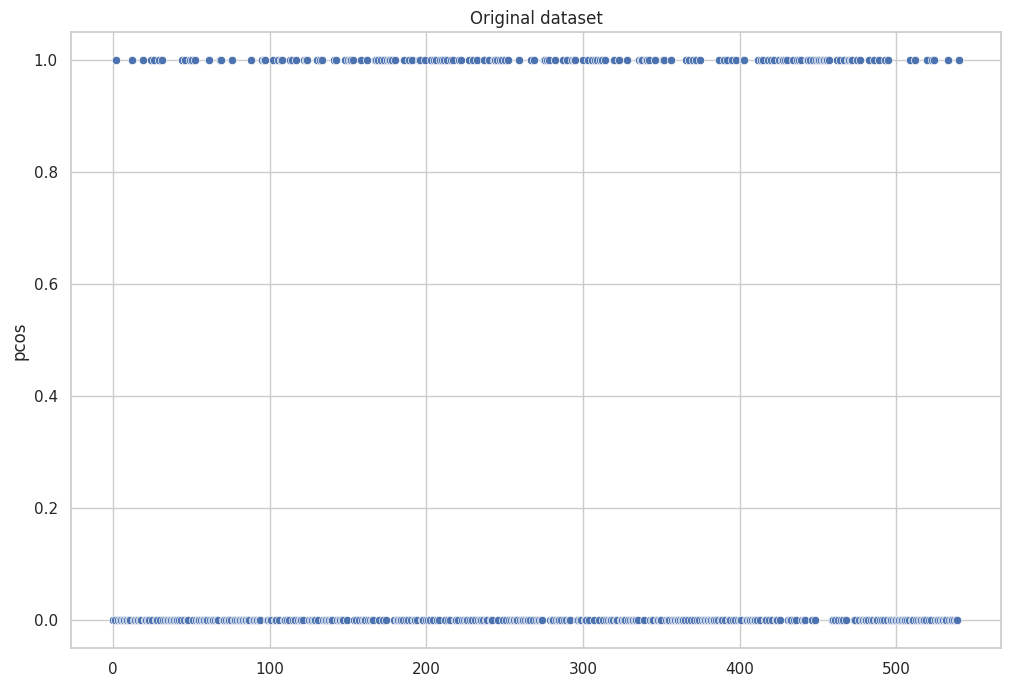

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot(
    data=df['pcos']
)
plt.title('Original dataset')
plt.show()

0    389
1    149
Name: cycle, dtype: int64


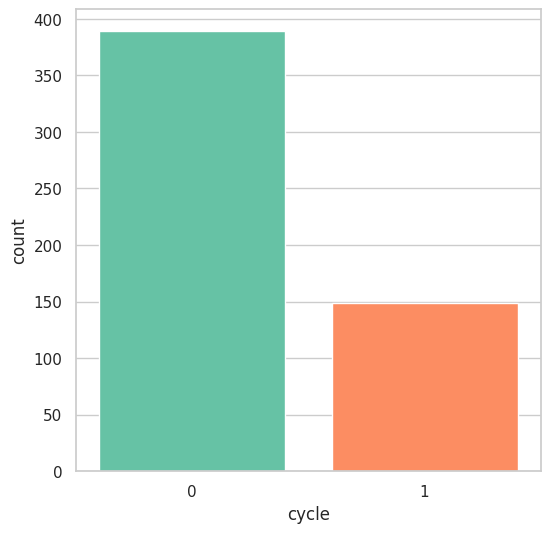

In [ ]:
print(df['cycle'].value_counts())
plt.figure(figsize=(6, 6))
sns.countplot(
    x='cycle',
    data=df,
    saturation = 1,
     palette = "Set2"
);

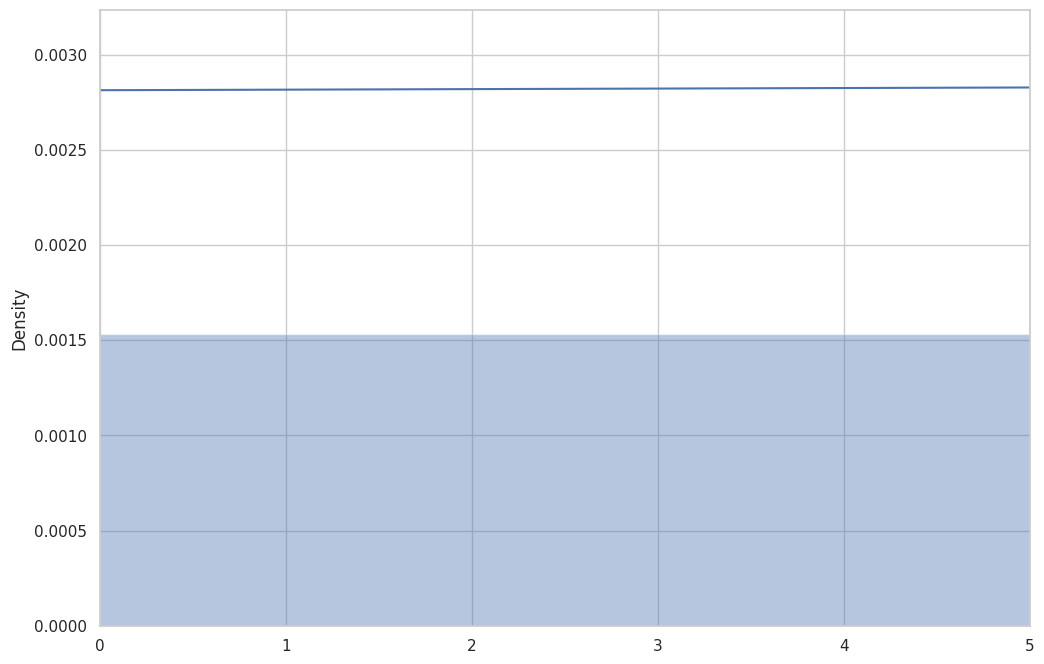

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df, ax=ax)
ax.set_xlim(0, 5)
plt.show()

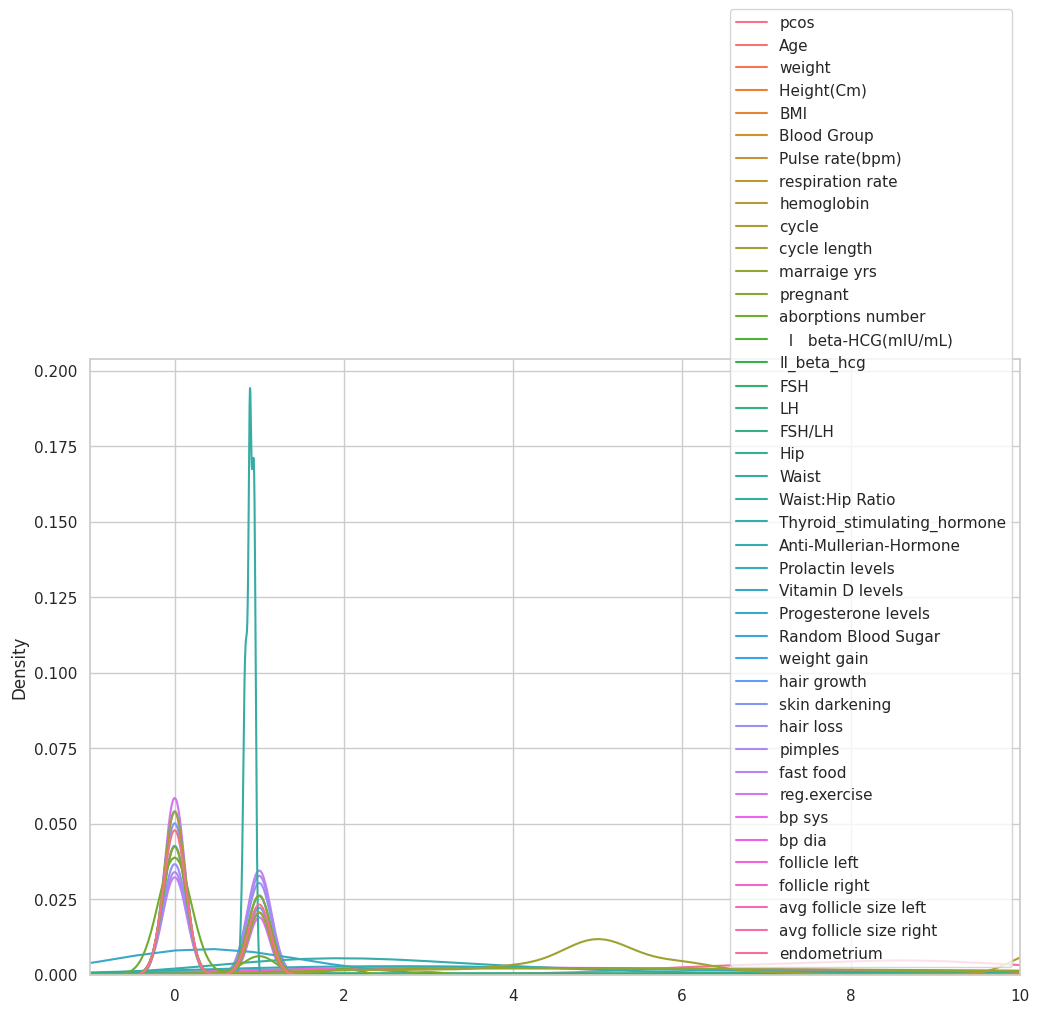

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(df, ax=ax)
ax.set_xlim(-1, 10)
plt.show()

#Comparision of various machine learning algorithms

In [ ]:
y_train_res

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,

In [ ]:
y_test

31     1
309    1
255    0
147    0
106    0
      ..
7      0
391    0
496    0
84     0
448    0
Name: pcos, Length: 108, dtype: int64

In [ ]:
y_train=y_train.drop('index',axis=1)

In [ ]:
X_test.shape


(108, 41)

In [ ]:
X_train.shape

(574, 41)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,roc_auc_score,roc_curve


##Random Forest

In [ ]:
random_forest= RandomForestClassifier()
random_forest.fit(X_train, y_train_res)
y_pred_rand= random_forest.predict(X_test)
accuracy_score(y_test,y_pred_rand)

0.7962962962962963

In [ ]:
print(classification_report(y_test, y_pred_rand))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83        75
           1       0.61      0.94      0.74        33

    accuracy                           0.80       108
   macro avg       0.79      0.84      0.79       108
weighted avg       0.86      0.80      0.80       108



In [ ]:
import pickle
pickle.dump(random_forest,open('randomforestmodel.pkl','wb'))

In [ ]:
pickled_model=pickle.load(open('randomforestmodel.pkl','rb'))

In [ ]:
pickled_model.predict(scaler.fit_transform(X_test[31].reshape(1,-1)))

##Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
clf=GradientBoostingClassifier()
clf.fit(X_train,y_train_res)
y_pred=clf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7037037037037037

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.89      0.65      0.75        75
           1       0.51      0.82      0.63        33

    accuracy                           0.70       108
   macro avg       0.70      0.74      0.69       108
weighted avg       0.77      0.70      0.72       108



In [ ]:
y_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0])

#XGb BOOSTING

In [ ]:
from xgboost import XGBClassifier

# Create a XGBoost classifier object
xgb_clf= XGBClassifier()

# Train the classifier on the training data
xgb_clf.fit(X_train, y_train_res)

# Make predictions on the test data
Y_pred_xgb = xgb_clf.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred_xgb))


              precision    recall  f1-score   support

           0       0.96      0.65      0.78        75
           1       0.54      0.94      0.69        33

    accuracy                           0.74       108
   macro avg       0.75      0.80      0.73       108
weighted avg       0.83      0.74      0.75       108



#ADA Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
# Train Adaboost Classifer
ada.fit(X_train._get_numeric_data(), y_train)

#Predict the response for test dataset
y_pred_ada = ada.predict(X_test._get_numeric_data())

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ada))